# Pet Adoption Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d rabieelkharoua/predict-pet-adoption-status-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100%|███████████████████████████████████████| 43.6k/43.6k [00:00<00:00, 190kB/s]
100%|███████████████████████████████████████| 43.6k/43.6k [00:00<00:00, 190kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Pet Adoption Prediction/predict-pet-adoption-status-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Pet Adoption Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('pet_adoption_data.csv')

In [5]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [6]:
df.shape

(2007, 13)

In [7]:
df.size

26091

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PetID,2007.0,1503.000000,579.515315,500.000000,1001.500000,1503.000000,2004.50000,2506.000000
AgeMonths,2007.0,92.279522,52.148363,1.000000,48.000000,94.000000,138.00000,179.000000
WeightKg,2007.0,15.705776,8.327749,1.018198,8.730396,15.925416,22.73718,29.995628
Vaccinated,2007.0,0.701046,0.457914,0.000000,0.000000,1.000000,1.00000,1.000000
HealthCondition,2007.0,0.196313,0.397307,0.000000,0.000000,0.000000,0.00000,1.000000
TimeInShelterDays,2007.0,43.974091,25.740253,1.000000,21.000000,45.000000,66.00000,89.000000
AdoptionFee,2007.0,249.142003,142.887040,0.000000,127.000000,242.000000,375.00000,499.000000
PreviousOwner,2007.0,0.301943,0.459215,0.000000,0.000000,0.000000,1.00000,1.000000
AdoptionLikelihood,2007.0,0.328351,0.469730,0.000000,0.000000,0.000000,1.00000,1.000000


In [10]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

PetID                 2007
PetType                  4
Breed                    7
AgeMonths              179
Color                    5
Size                     3
WeightKg              2007
Vaccinated               2
HealthCondition          2
TimeInShelterDays       89
AdoptionFee            493
PreviousOwner            2
AdoptionLikelihood       2
dtype: int64

In [13]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

## Data Visualization

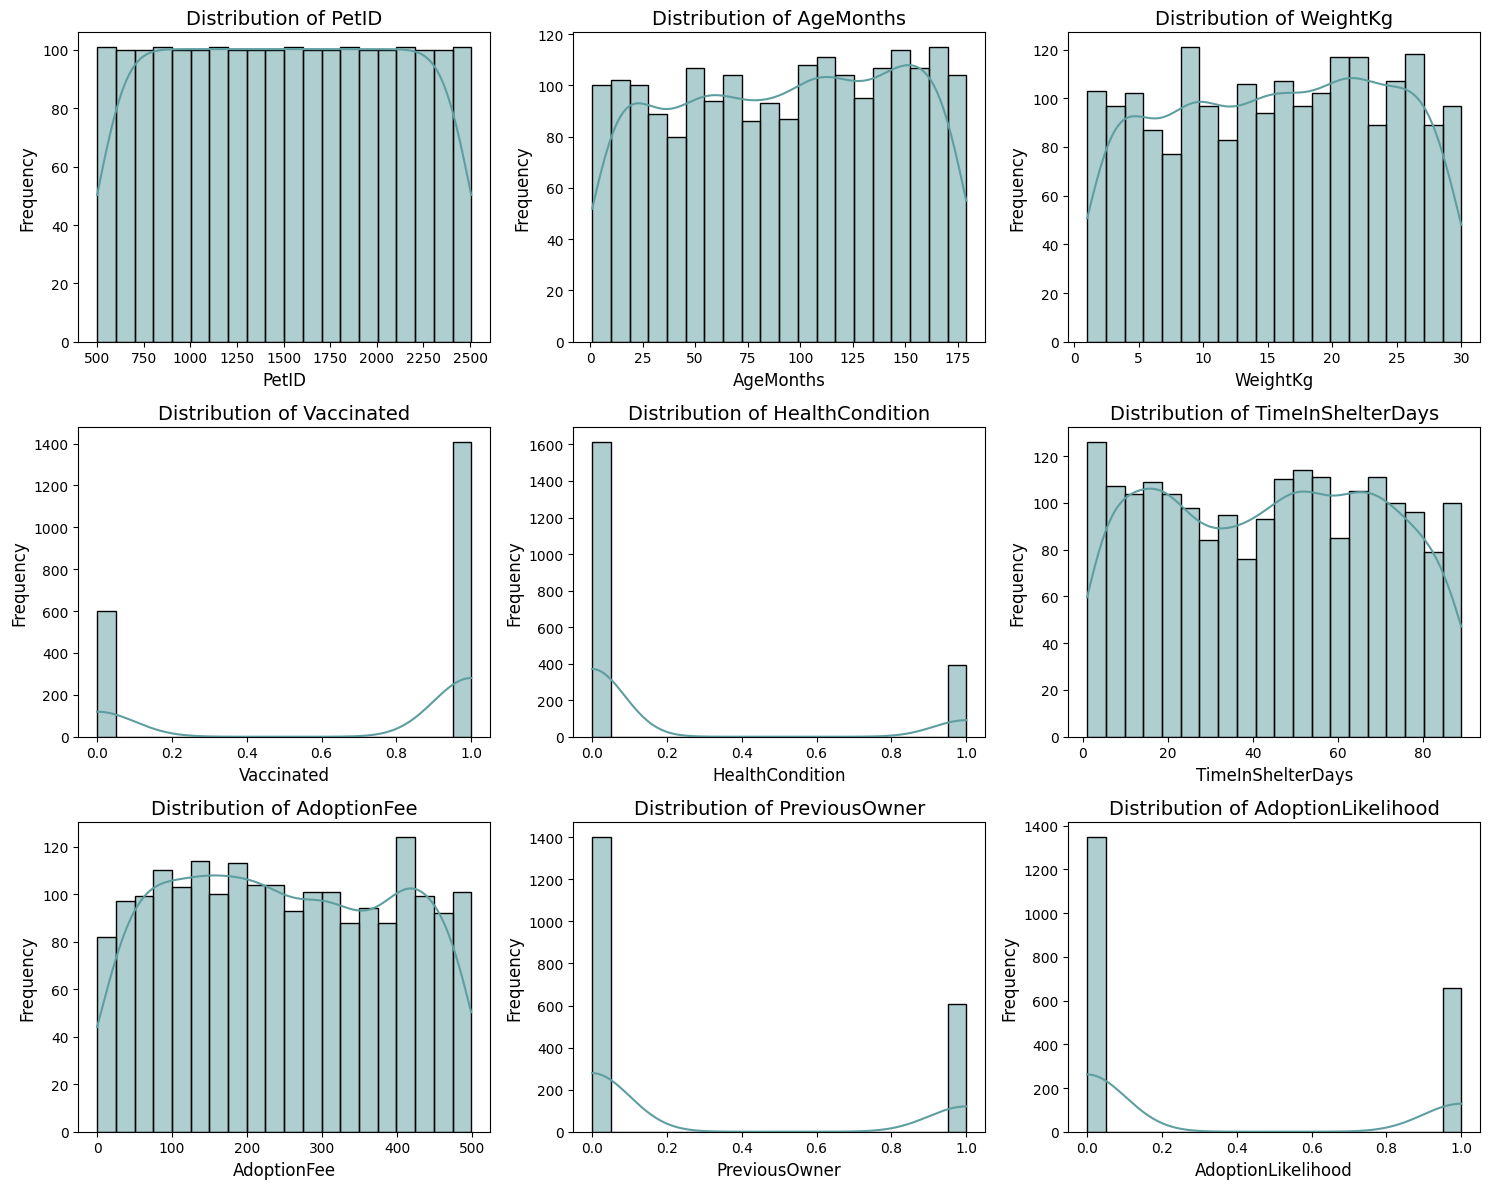

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

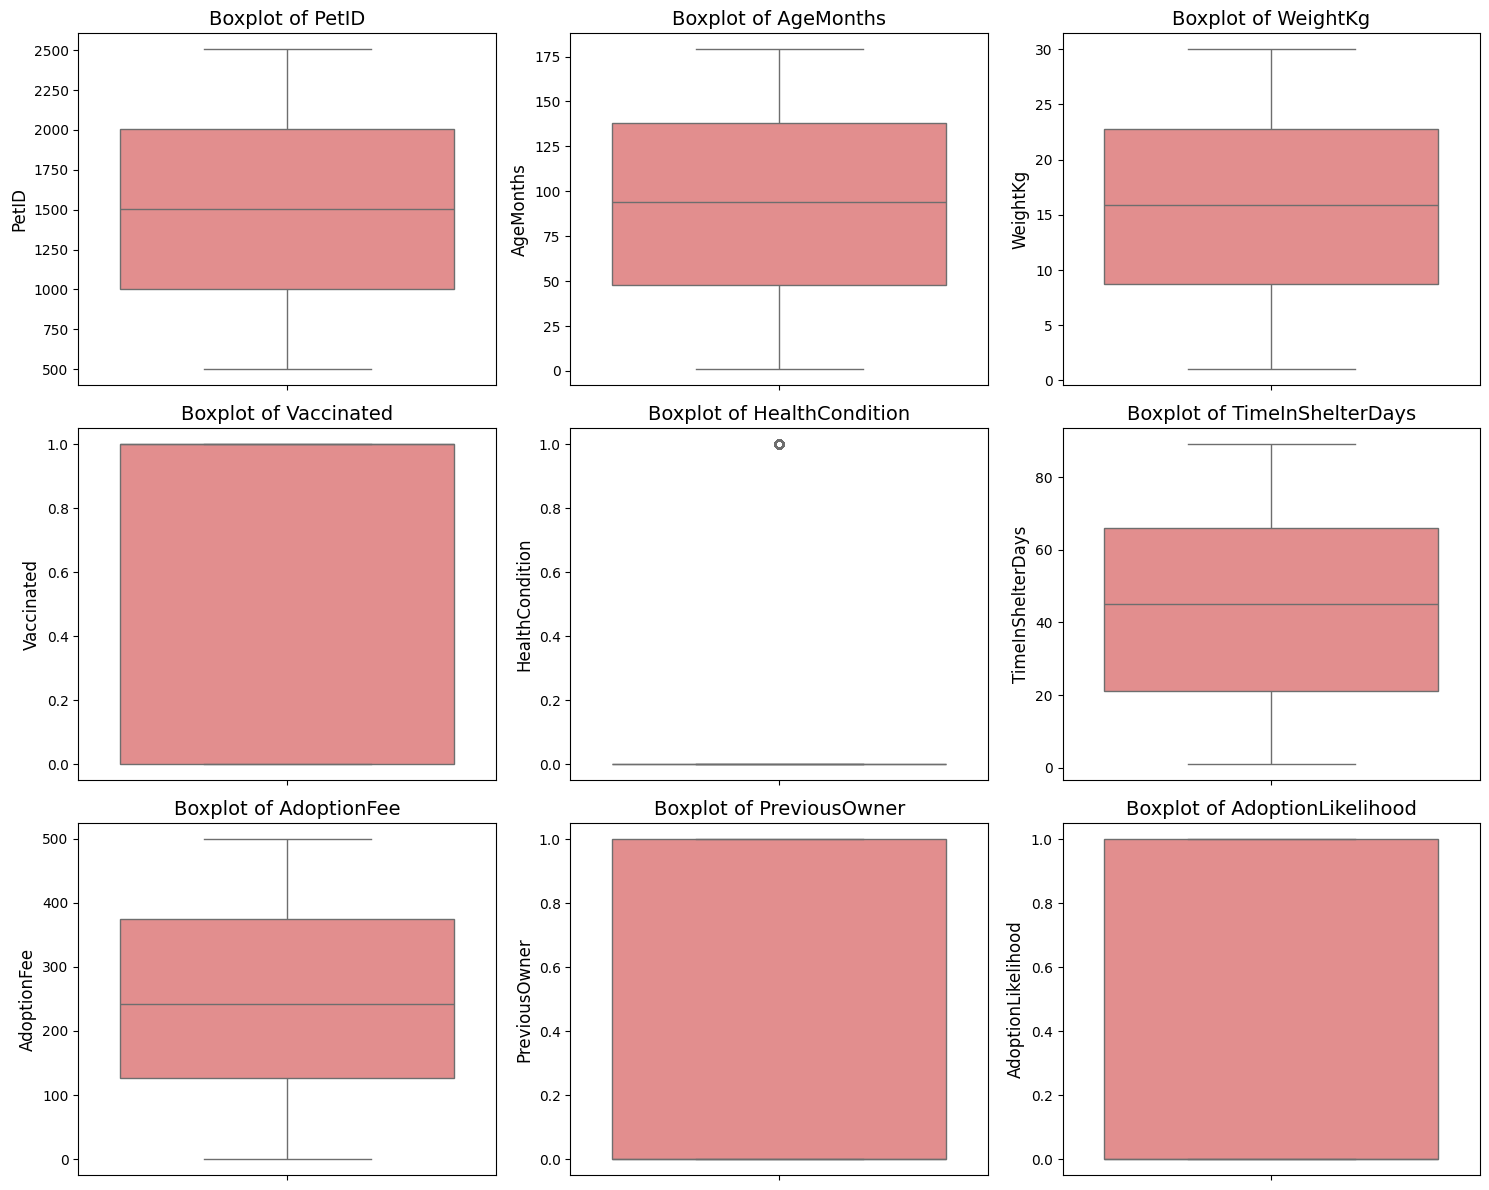

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

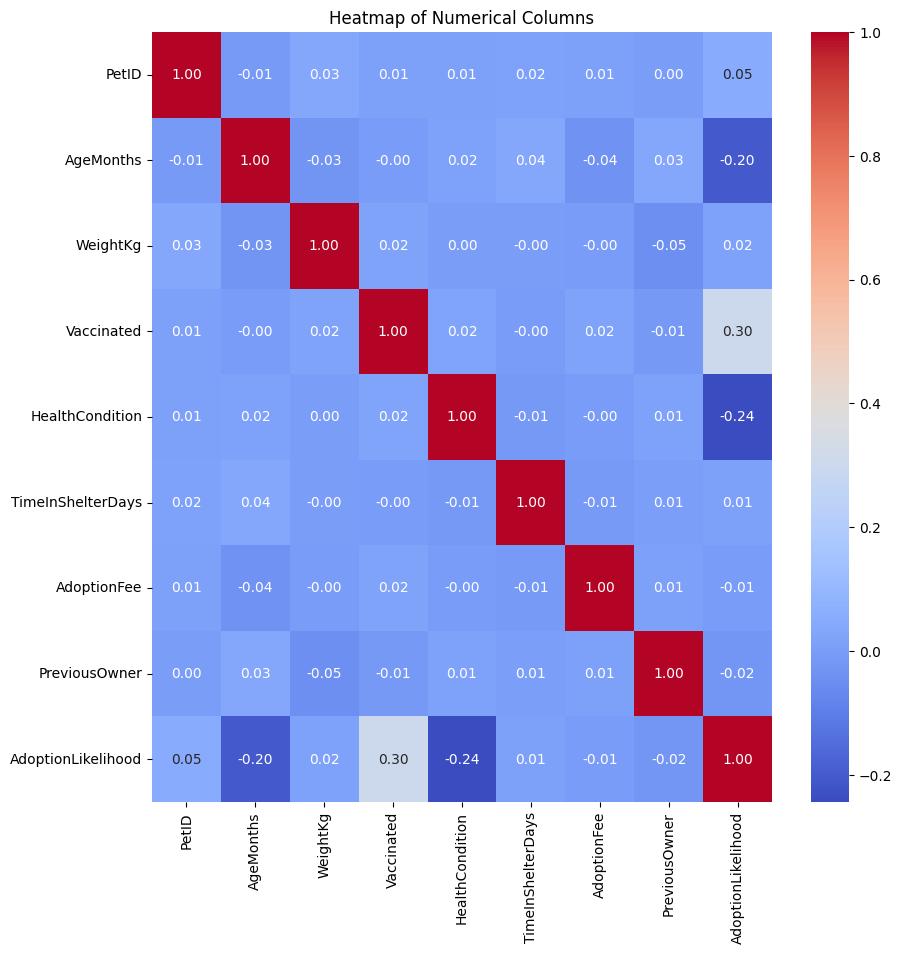

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [17]:
# Dropping unwanted column

df.drop(['PetID'], axis=1, inplace=True)

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop(columns=['AdoptionLikelihood'])
y = df['AdoptionLikelihood']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7164179104477612, 0.7263681592039801, 0.9353233830845771, 0.9402985074626866, 0.9502487562189055, 0.927860696517413, 0.9253731343283582, 0.9054726368159204, 0.8631840796019901]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1879
           1       0.88      0.95      0.91       121

    accuracy                           0.99      2000
   macro avg       0.94      0.97      0.95      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
 [[1863   16]
 [   6  115]]


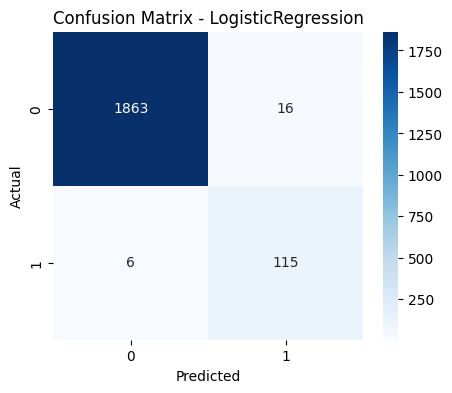

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1879
           1       0.00      0.00      0.00       121

    accuracy                           0.94      2000
   macro avg       0.47      0.50      0.48      2000
weighted avg       0.88      0.94      0.91      2000

Confusion Matrix:
 [[1879    0]
 [ 121    0]]


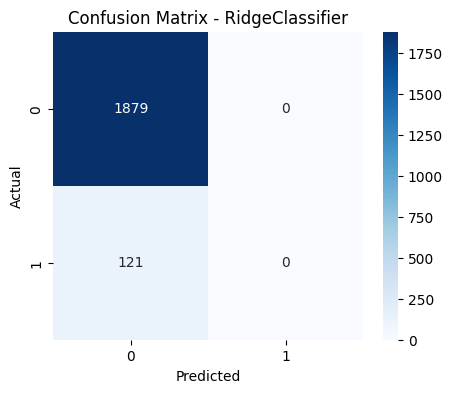

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       0.97      1.00      0.98       121

    accuracy                           1.00      2000
   macro avg       0.98      1.00      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1875    4]
 [   0  121]]


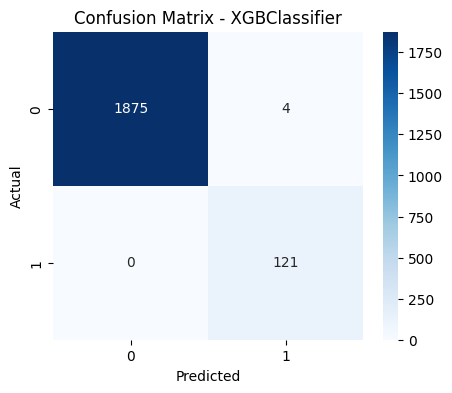

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


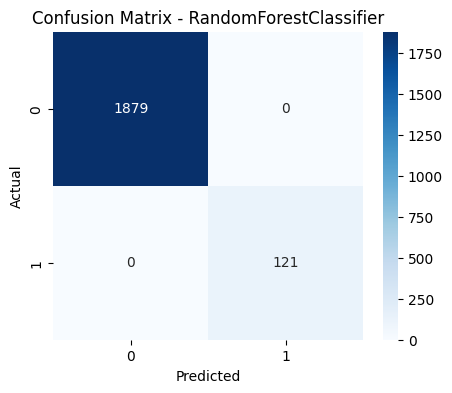

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


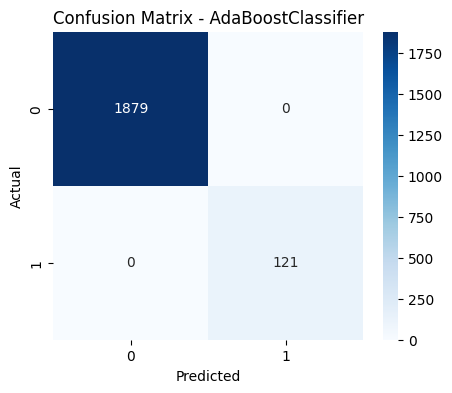

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


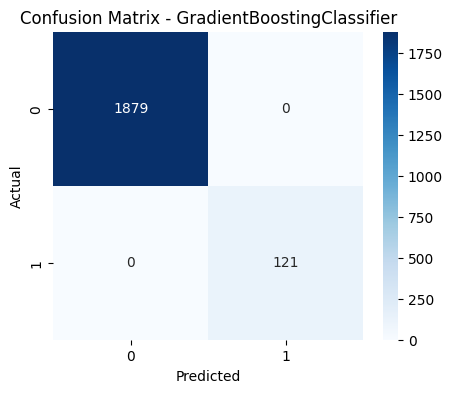

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


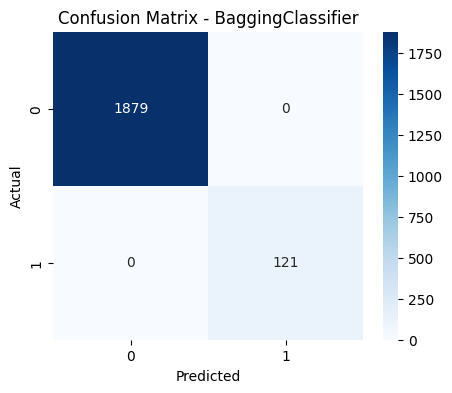

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1879
           1       1.00      1.00      1.00       121

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1879    0]
 [   0  121]]


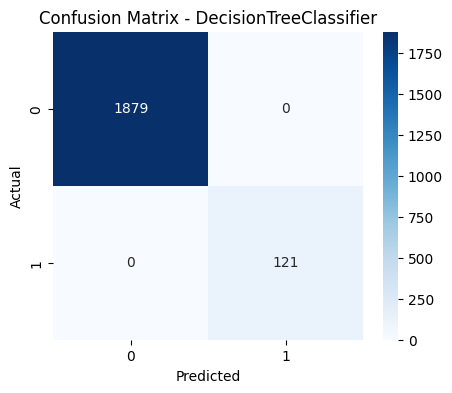

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1879
           1       0.75      0.55      0.64       121

    accuracy                           0.96      2000
   macro avg       0.86      0.77      0.81      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix:
 [[1857   22]
 [  54   67]]


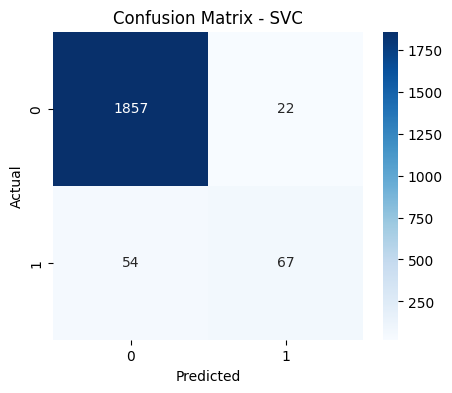

In [22]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()